<a href="https://colab.research.google.com/github/bhirwa/User-analytics-in-the-Telecom-Industry/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [104]:
import os
path = "/content" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)

In [105]:
!ls gdrive/MyDrive/Colab\ Notebooks/

Data		 Untitled0.ipynb  Untitled2.ipynb  Untitled4.ipynb
notebook1.ipynb  Untitled1.ipynb  Untitled3.ipynb


In [106]:
cd gdrive/MyDrive/Colab\ Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


In [107]:
import pandas as pd
import numpy as np 

In [108]:
df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Data/Week1_challenge_data_source.xlsx') 
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [109]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [110]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [111]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(db):

    # Calculate total number of cells in dataframe
    totalCells = np.product(db.shape)

    # Count number of missing values per column
    missingCount = db.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecommunication industry dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The Telecommunication industry dataset contains 12.49 % missing values.


In [112]:
df.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322

In [113]:
df.columns = df.columns.str.replace(' ','').str.replace('(', '').str.replace(')', '')
df

,BearerId,Start,Startms,End,Endms,Dur.ms,IMSI,MSISDN/Number,IMEI,LastLocationName,AvgRTTDLms,AvgRTTULms,AvgBearerTPDLkbps,AvgBearerTPULkbps,TCPDLRetrans.VolBytes,TCPULRetrans.VolBytes,DLTP<50Kbps%,50Kbps<DLTP<250Kbps%,250Kbps<DLTP<1Mbps%,DLTP>1Mbps%,ULTP<10Kbps%,10Kbps<ULTP<50Kbps%,50Kbps<ULTP<300Kbps%,ULTP>300Kbps%,HTTPDLBytes,HTTPULBytes,ActivityDurationDLms,ActivityDurationULms,Dur.ms.1,HandsetManufacturer,HandsetType,Nbofsecwith125000B<VolDL,Nbofsecwith1250B<VolUL<6250B,Nbofsecwith31250B<VolDL<125000B,Nbofsecwith37500B<VolUL,Nbofsecwith6250B<VolDL<31250B,Nbofsecwith6250B<VolUL<37500B,NbofsecwithVolDL<6250B,NbofsecwithVolUL<1250B,SocialMediaDLBytes,SocialMediaULBytes,GoogleDLBytes,GoogleULBytes,EmailDLBytes,EmailULBytes,YoutubeDLBytes,YoutubeULBytes,NetflixDLBytes,NetflixULBytes,GamingDLBytes,GamingULBytes,OtherDLBytes,OtherULBytes,TotalULBytes,TotalDLBytes
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,42376.0,41915.0,8.123076e+07,Apple,Apple iPhone 8 Plus (A1897),NaN,NaN,NaN,NaN,NaN,NaN,223.0,229.0,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370

In [114]:
print(f'Handset Type: {df.HandsetType.count()}')
print(f'Handset Type: {df.HandsetManufacturer.count()}')

Handset Type: 149429
Handset Type: 149429


In [115]:
print(f'Handset Type: {df.HandsetManufacturer.nunique()}')
print(f'Handset Manufacturer: {df.HandsetManufacturer.nunique()}')

Handset Type: 170
Handset Manufacturer: 170


In [116]:
print(f'Handset Type: {df.HandsetType.dtype}')
print(f'Handset Manufacturer: {df.HandsetManufacturer.dtype}')

Handset Type: object
Handset Manufacturer: object


In [117]:
# Now which column(s) has missing values
df.isna().sum()

BearerId                                0
Start                                   1
Startms                                 1
End                                     1
Endms                                   1
Dur.ms                                  1
IMSI                                  570
MSISDN/Number                        1066
IMEI                                  572
LastLocationName                     1153
AvgRTTDLms                          27829
AvgRTTULms                          27812
AvgBearerTPDLkbps                       1
AvgBearerTPULkbps                       1
TCPDLRetrans.VolBytes               88146
TCPULRetrans.VolBytes               96649
DLTP<50Kbps%                          754
50Kbps<DLTP<250Kbps%                  754
250Kbps<DLTP<1Mbps%                   754
DLTP>1Mbps%                           754
ULTP<10Kbps%                          792
10Kbps<ULTP<50Kbps%                   792
50Kbps<ULTP<300Kbps%                  792
ULTP>300Kbps%                     

In [118]:
df_clean = df.drop(columns=['TCPDLRetrans.VolBytes', 'TCPULRetrans.VolBytes', 'HTTPDLBytes', 'HTTPULBytes', 'Nbofsecwith125000B<VolDL', 'Nbofsecwith1250B<VolUL<6250B', 'Nbofsecwith31250B<VolDL<125000B', 'Nbofsecwith37500B<VolUL', 'Nbofsecwith6250B<VolDL<31250B', 'Nbofsecwith6250B<VolUL<37500B'])
df.info()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BearerId                         150001 non-null  object        
 1   Start                            150000 non-null  datetime64[ns]
 2   Startms                          150000 non-null  float64       
 3   End                              150000 non-null  datetime64[ns]
 4   Endms                            150000 non-null  float64       
 5   Dur.ms                           150000 non-null  float64       
 6   IMSI                             149431 non-null  float64       
 7   MSISDN/Number                    148935 non-null  float64       
 8   IMEI                             149429 non-null  float64       
 9   LastLocationName                 148848 non-null  object        
 10  AvgRTTDLms                       122172 non-

In [119]:
df_clean.shape

(150001, 45)

In [ ]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)

def fix_missing_ffill(db, col):
    db[col] = db[col].fillna(method='ffill')
    return db[col]


def fix_missing_bfill(db, col):
    db[col] = db[col].fillna(method='bfill')
    return db[col]

df_clean['TotalULBytes'] = fix_missing_ffill(df_clean, 'TotalULBytes')
df_clean['TotalDLBytes'] = fix_missing_ffill(df_clean, 'TotalDLBytes')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')
df_clean['Startms'] = fix_missing_ffill(df_clean, 'Startms')
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['Endms'] = fix_missing_ffill(df_clean, 'Endms')
df_clean['Dur.ms'] = fix_missing_ffill(df_clean, 'Dur.ms')
df_clean['IMSI'] = fix_missing_ffill(df_clean, 'IMSI')
df_clean['MSISDN/Number'] = fix_missing_ffill(df_clean, 'MSISDN/Number')
df_clean['IMEI'] = fix_missing_ffill(df_clean, 'IMEI')
df_clean['AvgRTTDLms'] = fix_missing_ffill(df_clean, 'AvgRTTDLms')
df_clean['AvgRTTULms'] = fix_missing_ffill(df_clean, 'AvgRTTULms')
df_clean['AvgBearerTPDLkbps'] = fix_missing_ffill(df_clean, 'AvgBearerTPDLkbps')
df_clean['AvgBearerTPULkbps'] = fix_missing_ffill(df_clean, 'AvgBearerTPULkbps')
df_clean['DLTP<50Kbps%'] = fix_missing_ffill(df_clean, 'DLTP<50Kbps%')
df_clean['50Kbps<DLTP<250Kbps%'] = fix_missing_ffill(df_clean, '50Kbps<DLTP<250Kbps%')
df_clean['250Kbps<DLTP<1Mbps%'] = fix_missing_ffill(df_clean, '250Kbps<DLTP<1Mbps%')
df_clean['DLTP>1Mbps%'] = fix_missing_ffill(df_clean, 'DLTP>1Mbps%')
df_clean['ULTP<10Kbps%'] = fix_missing_ffill(df_clean, 'ULTP<10Kbps%')
df_clean['10Kbps<ULTP<50Kbps%'] = fix_missing_ffill(df_clean, '10Kbps<ULTP<50Kbps%')
df_clean['50Kbps<ULTP<300Kbps%'] = fix_missing_ffill(df_clean, '50Kbps<ULTP<300Kbps%')
df_clean['ULTP>300Kbps%'] = fix_missing_ffill(df_clean, 'ULTP>300Kbps%')
df_clean['ActivityDurationDLms'] = fix_missing_ffill(df_clean, 'ActivityDurationDLms')
df_clean['ActivityDurationULms'] = fix_missing_ffill(df_clean, 'ActivityDurationULms')
df_clean['Dur.ms.1'] = fix_missing_ffill(df_clean, 'Dur.ms.1')
df_clean['NbofsecwithVolDL<6250B'] = fix_missing_ffill(df_clean, 'NbofsecwithVolDL<6250B')
df_clean['NbofsecwithVolUL<1250B'] = fix_missing_ffill(df_clean, 'NbofsecwithVolUL<1250B')

# fill 'race' column with mode 
df_clean['HandsetType'] = df_clean['HandsetType'].fillna(df_clean['HandsetType'].mode()[0])
df_clean['HandsetManufacturer'] = df_clean['HandsetManufacturer'].fillna(df_clean['HandsetManufacturer'].mode()[0])
df_clean['LastLocationName'] = df_clean['LastLocationName'].fillna(df_clean['LastLocationName'].mode()[0])


In [120]:
df_clean.isna().sum()

BearerId                      0
Start                         1
Startms                       1
End                           1
Endms                         1
Dur.ms                        1
IMSI                        570
MSISDN/Number              1066
IMEI                        572
LastLocationName           1153
AvgRTTDLms                27829
AvgRTTULms                27812
AvgBearerTPDLkbps             1
AvgBearerTPULkbps             1
DLTP<50Kbps%                754
50Kbps<DLTP<250Kbps%        754
250Kbps<DLTP<1Mbps%         754
DLTP>1Mbps%                 754
ULTP<10Kbps%                792
10Kbps<ULTP<50Kbps%         792
50Kbps<ULTP<300Kbps%        792
ULTP>300Kbps%               792
ActivityDurationDLms          1
ActivityDurationULms          1
Dur.ms.1                      1
HandsetManufacturer         572
HandsetType                 572
NbofsecwithVolDL<6250B      755
NbofsecwithVolUL<1250B      793
SocialMediaDLBytes            0
SocialMediaULBytes            0
GoogleDL

In [121]:
print(df.TotalDLBytes.min())
print(df.TotalULBytes.min())
print(df.TotalDLBytes.quantile(.25))
print(df.TotalULBytes.quantile(.25))
print(df.TotalDLBytes.quantile(.50))
print(df.TotalULBytes.quantile(.50))
print(df.TotalDLBytes.quantile(.75))
print(df.TotalULBytes.quantile(.75))
print(df.TotalDLBytes.max())
print(df.TotalDLBytes.max())
print('\n')
print(df.TotalDLBytes.mean())
print(df.TotalULBytes.median())
print(df.TotalDLBytes.mode().values[0])

7114041.0
2866892.0
243106803.0
33222010.5
455841077.5
41143312.0
665705544.0
49034238.5
902969616.0
902969616.0


454643430.0789667
41143312.0
74126119.0


In [122]:
print(df.TotalDLBytes.std())
print(df.TotalULBytes.std())


244142874.37628293
11276386.51468901


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
847,71.779726
1710,32.141869
1323,191.137853
1,67.171805
806,1103.239950


**Scaling and Normalization**

In [124]:
original_data[0].min(), original_data[0].max()

(0.028068163158810156, 1914.9000591927795)

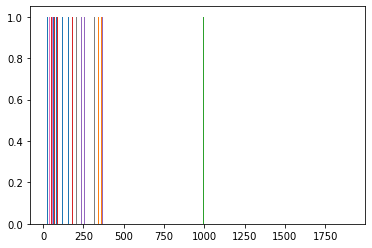

In [125]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

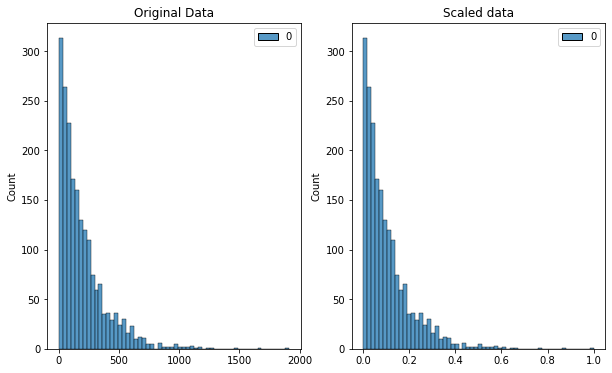

In [126]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

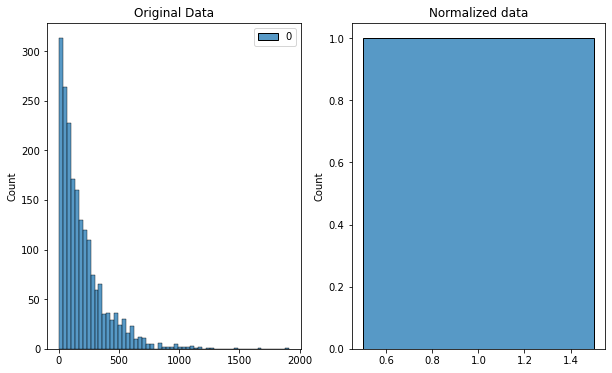

In [127]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [128]:
# check datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BearerId                150001 non-null  object        
 1   Start                   150000 non-null  datetime64[ns]
 2   Startms                 150000 non-null  float64       
 3   End                     150000 non-null  datetime64[ns]
 4   Endms                   150000 non-null  float64       
 5   Dur.ms                  150000 non-null  float64       
 6   IMSI                    149431 non-null  float64       
 7   MSISDN/Number           148935 non-null  float64       
 8   IMEI                    149429 non-null  float64       
 9   LastLocationName        148848 non-null  object        
 10  AvgRTTDLms              122172 non-null  float64       
 11  AvgRTTULms              122189 non-null  float64       
 12  AvgBearerTPDLkbps       150000

In [129]:
# Top 10 handsets used by the customers

df_clean['HandsetType'].value_counts()[:10]

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: HandsetType, dtype: int64

In [130]:
# Top 3 handset manufacturers
df_clean['HandsetManufacturer'].value_counts()[:3]

Apple      59565
Samsung    40839
Huawei     34423
Name: HandsetManufacturer, dtype: int64

In [131]:
# Top 5 handsets per top 3 handset manufacturer
Apple_Handsets = df_clean[df_clean['HandsetManufacturer'] == 'Apple']
Apple_Handsets['HandsetType'].value_counts()[:5]

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: HandsetType, dtype: int64

In [132]:
Samsung_Handsets = df_clean[df_clean['HandsetManufacturer'] == 'Samsung']
Samsung_Handsets['HandsetType'].value_counts()[:5]

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: HandsetType, dtype: int64

In [133]:
Huawei_handsets = df_clean[df_clean['HandsetManufacturer'] == 'Huawei']
Huawei_handsets['HandsetType'].value_counts()[:5]

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: HandsetType, dtype: int64

**Number of xDR sessions**

In [134]:
sessions = df_clean[['MSISDN/Number','BearerId']]
session_count = sessions.groupby(['MSISDN/Number']).count()
session_count

,BearerId
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


In [135]:

session_count.describe()

,BearerId
count,106856.000000
mean,1.393792
std,0.806022
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


**Session** **Durantion**

In [136]:
# Sessions Durathion
session_duration = df_clean.groupby(['MSISDN/Number'])['Dur.ms'].sum()
session_duration.head()

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
Name: Dur.ms, dtype: float64

**Total UL and DL data**

In [137]:
# aggregate of the total download and upload data

Total_UL_DL_data = df_clean.groupby('MSISDN/Number')['TotalULBytes', 'TotalDLBytes'].sum()

Total_UL_DL_data.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,TotalULBytes,TotalDLBytes
MSISDN/Number,,
3.360100e+10,36053108.0,8.426375e+08
3.360100e+10,36104459.0,1.207552e+08
3.360100e+10,39306820.0,5.566597e+08
3.360101e+10,20327526.0,4.019932e+08
3.360101e+10,94280527.0,1.363130e+09


**Social Media Sessions**

In [138]:
# aggregate of social media sessions
Total_Social_Media_data = df_clean.groupby(['MSISDN/Number'])['SocialMediaDLBytes', 'SocialMediaULBytes'].sum()
Total_Social_Media_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,SocialMediaDLBytes,SocialMediaULBytes
MSISDN/Number,,
3.360100e+10,2206504.0,25631.0
3.360100e+10,2598548.0,62017.0
3.360100e+10,3148004.0,47619.0
3.360101e+10,251469.0,28825.0
3.360101e+10,2861230.0,51312.0


**Google sessions**

In [139]:
# aggregate of google sessions
Total_Google_data = df_clean.groupby(['MSISDN/Number'])['GoogleDLBytes', 'GoogleULBytes'].sum()
Total_Google_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,GoogleDLBytes,GoogleULBytes
MSISDN/Number,,
3.360100e+10,3337123.0,1051882.0
3.360100e+10,4197697.0,1137166.0
3.360100e+10,3343483.0,99643.0
3.360101e+10,5937765.0,3740728.0
3.360101e+10,13728668.0,4770948.0


**Email sessions**

In [140]:
# aggregate of email sessions
Total_email_data = df_clean.groupby(['MSISDN/Number'])['EmailDLBytes', 'EmailULBytes'].sum()
Total_email_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,EmailDLBytes,EmailULBytes
MSISDN/Number,,
3.360100e+10,837400.0,493962.0
3.360100e+10,2828821.0,478960.0
3.360100e+10,2436500.0,768880.0
3.360101e+10,2178618.0,106052.0
3.360101e+10,2247808.0,1057661.0


**Youtube sessions**

In [141]:
# aggregate of youtube sessions
Total_Youtube_data = df_clean.groupby(['MSISDN/Number'])['YoutubeDLBytes', 'YoutubeULBytes'].sum()
Total_Youtube_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,YoutubeDLBytes,YoutubeULBytes
MSISDN/Number,,
3.360100e+10,14900201.0,6724347.0
3.360100e+10,5324251.0,7107972.0
3.360100e+10,2137272.0,19196298.0
3.360101e+10,4393123.0,2584198.0
3.360101e+10,10339971.0,31193031.0


**Netflix sessions**

In [142]:
# aggregate of netflix sessions
Total_netflix_data = df_clean.groupby(['MSISDN/Number'])['NetflixDLBytes', 'NetflixULBytes'].sum()
Total_netflix_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NetflixDLBytes,NetflixULBytes
MSISDN/Number,,
3.360100e+10,10265105.0,16915876.0
3.360100e+10,770569.0,10451194.0
3.360100e+10,16525919.0,2827981.0
3.360101e+10,1157362.0,784730.0
3.360101e+10,24971647.0,24230077.0


**Gaming sessions**

In [143]:
# aggregate of Gaming sessions
Total_Gaming_data = df_clean.groupby(['MSISDN/Number'])['GamingDLBytes', 'GamingULBytes'].sum()
Total_Gaming_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,GamingDLBytes,GamingULBytes
MSISDN/Number,,
3.360100e+10,8.110911e+08,1367528.0
3.360100e+10,1.050353e+08,14714780.0
3.360100e+10,5.290685e+08,9759228.0
3.360101e+10,3.880748e+08,3051292.0
3.360101e+10,1.308981e+09,5816727.0


**Other sessions**

In [144]:

#aggregate of other sessions
Total_Other_data = df_clean.groupby(['MSISDN/Number'])['OtherDLBytes', 'OtherULBytes'].sum()
Total_Other_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,OtherDLBytes,OtherULBytes
MSISDN/Number,,
3.360100e+10,377096990.0,9473882.0
3.360100e+10,279557701.0,2152370.0
3.360100e+10,495086501.0,6607171.0
3.360101e+10,25248001.0,10031701.0
3.360101e+10,777643713.0,27160771.0


In [145]:
df_agg = df_clean[['MSISDN/Number', 'Dur.ms',
                'SocialMediaDLBytes','SocialMediaULBytes', 'GoogleDLBytes', 
                'GoogleULBytes', 'EmailDLBytes', 'EmailULBytes', 'YoutubeDLBytes', 
                'YoutubeULBytes', 'NetflixDLBytes', 'NetflixULBytes', 'GamingDLBytes', 
                'GamingULBytes', 'OtherDLBytes', 'OtherULBytes', 'TotalULBytes', 'TotalDLBytes']].groupby(['MSISDN/Number']).sum()
df_agg.head()

,Dur.ms,SocialMediaDLBytes,SocialMediaULBytes,GoogleDLBytes,GoogleULBytes,EmailDLBytes,EmailULBytes,YoutubeDLBytes,YoutubeULBytes,NetflixDLBytes,NetflixULBytes,GamingDLBytes,GamingULBytes,OtherDLBytes,OtherULBytes,TotalULBytes,TotalDLBytes
MSISDN/Number,,,,,,,,,,,,,,,,,
3.360100e+10,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08
3.360100e+10,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
3.360100e+10,134969.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
3.360101e+10,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
3.360101e+10,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09


In [148]:
df_clean

,BearerId,Start,Startms,End,Endms,Dur.ms,IMSI,MSISDN/Number,IMEI,LastLocationName,AvgRTTDLms,AvgRTTULms,AvgBearerTPDLkbps,AvgBearerTPULkbps,DLTP<50Kbps%,50Kbps<DLTP<250Kbps%,250Kbps<DLTP<1Mbps%,DLTP>1Mbps%,ULTP<10Kbps%,10Kbps<ULTP<50Kbps%,50Kbps<ULTP<300Kbps%,ULTP>300Kbps%,ActivityDurationDLms,ActivityDurationULms,Dur.ms.1,HandsetManufacturer,HandsetType,NbofsecwithVolDL<6250B,NbofsecwithVolUL<1250B,SocialMediaDLBytes,SocialMediaULBytes,GoogleDLBytes,GoogleULBytes,EmailDLBytes,EmailULBytes,YoutubeDLBytes,YoutubeULBytes,NetflixDLBytes,NetflixULBytes,GamingDLBytes,GamingULBytes,OtherDLBytes,OtherULBytes,TotalULBytes,TotalDLBytes
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,42376.0,41915.0,8.123076e+07,Apple,Apple iPhone 8 Plus (A1897),223.0,229.0,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.0,2.0,23.0,54.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,17264.0,16759.0,9.797070e+07,Apple,Apple iPhone Se (A1723),105.0,102.0,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+0

In [151]:
df_agg

,Dur.ms,SocialMediaDLBytes,SocialMediaULBytes,GoogleDLBytes,GoogleULBytes,EmailDLBytes,EmailULBytes,YoutubeDLBytes,YoutubeULBytes,NetflixDLBytes,NetflixULBytes,GamingDLBytes,GamingULBytes,OtherDLBytes,OtherULBytes,TotalULBytes,TotalDLBytes
MSISDN/Number,,,,,,,,,,,,,,,,,
3.360100e+10,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08
3.360100e+10,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
3.360100e+10,134969.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
3.360101e+10,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
3.360101e+10,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,8810.0,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,26716429.0,6.879252e+08
3.379000e+10,140988.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,35732243.0,4.445751e+08
3.197021e+12,877385.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,37295915.0,1.948281e+08


**EDA**

**Fill missing values with mean**

In [152]:
new_df = df_agg.copy()
new_df.head()

,Dur.ms,SocialMediaDLBytes,SocialMediaULBytes,GoogleDLBytes,GoogleULBytes,EmailDLBytes,EmailULBytes,YoutubeDLBytes,YoutubeULBytes,NetflixDLBytes,NetflixULBytes,GamingDLBytes,GamingULBytes,OtherDLBytes,OtherULBytes,TotalULBytes,TotalDLBytes
MSISDN/Number,,,,,,,,,,,,,,,,,
3.360100e+10,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08
3.360100e+10,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
3.360100e+10,134969.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
3.360101e+10,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
3.360101e+10,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09


In [153]:
#Fill missing values with mean

new_df.fillna(new_df.mean(), inplace = True)

# Now which column(s) has missing values
new_df.isna().sum()


Dur.ms                0
SocialMediaDLBytes    0
SocialMediaULBytes    0
GoogleDLBytes         0
GoogleULBytes         0
EmailDLBytes          0
EmailULBytes          0
YoutubeDLBytes        0
YoutubeULBytes        0
NetflixDLBytes        0
NetflixULBytes        0
GamingDLBytes         0
GamingULBytes         0
OtherDLBytes          0
OtherULBytes          0
TotalULBytes          0
TotalDLBytes          0
dtype: int64

In [154]:
# Down here is a description of all the relevant varibles

new_df.describe()

,Dur.ms,SocialMediaDLBytes,SocialMediaULBytes,GoogleDLBytes,GoogleULBytes,EmailDLBytes,EmailULBytes,YoutubeDLBytes,YoutubeULBytes,NetflixDLBytes,NetflixULBytes,GamingDLBytes,GamingULBytes,OtherDLBytes,OtherULBytes,TotalULBytes,TotalDLBytes
count,1.068560e+05,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,1.461672e+05,2.502081e+06,45886.012802,8.016496e+06,2.865938e+06,2.497352e+06,6.514435e+05,1.621461e+07,1.534379e+07,1.620639e+07,1.533194e+07,5.882158e+08,1.155326e+07,5.869916e+08,1.151716e+07,5.730942e+07,6.336527e+08
std,1.863587e+05,1.887588e+06,34717.044775,6.065160e+06,2.172787e+06,1.897063e+06,4.948601e+05,1.232294e+07,1.159870e+07,1.231717e+07,1.161060e+07,4.440290e+08,8.731469e+06,4.437790e+08,8.706879e+06,3.565765e+07,4.645551e+08
min,7.142000e+03,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,2.866892e+06,8.827082e+06
25%,7.130800e+04,1.175902e+06,21600.750000,3.802894e+06,1.341100e+06,1.184544e+06,3.065678e+05,7.647143e+06,7.246758e+06,7.593534e+06,7.206775e+06,2.793230e+08,5.445849e+06,2.767785e+08,5.461189e+06,3.639547e+07,3.148271e+08
50%,1.027400e+05,2.265000e+06,41559.500000,7.256742e+06,2.593314e+06,2.266259e+06,5.872975e+05,1.460547e+07,1.386731e+07,1.463991e+07,1.387814e+07,5.325190e+08,1.044654e+07,5.299489e+08,1.037673e+07,4.679387e+07,5.703677e+08
75%,1.727990e+05,3.267238e+06,59919.250000,1.043106e+07,3.743934e+06,3.250651e+06,8.525612e+05,2.112900e+07,1.997808e+07,2.113463e+07,2.000853e+07,7.669561e+08,1.508080e+07,7.653643e+08,1.502752e+07,6.573199e+07,8.073645e+08
max,1.855375e+07,4.274384e+07,630942.000000,1.161065e+08,3.608540e+07,3.360721e+07,9.013997e+06,2.378830e+08,2.150757e+08,1.994792e+08,2.032419e+08,7.622035e+09,1.547897e+08,8.025477e+09,1.529305e+08,7.295774e+08,8.156743e+09


In [155]:
#Taking care of the outliers in my dataset

def format_float(value):
    return f'{value:,.2f}'

def convert_bytes_to_megabytes(new_df, bytes_data):
    megabyte = 1*10e+5
    new_df[bytes_data] = new_df[bytes_data] / megabyte
    return new_df[bytes_data]

def fix_outlier(new_df, column_list):
    for column in column_list:
        new_df[column] = np.where(new_df[column] > new_df[column].quantile(0.95), new_df[column].mean(),new_df[column])
    
    return new_df

pd.options.display.float_format = format_float

In [156]:
new_df = fix_outlier(new_df, list(new_df.columns))

**Non graphical univariate analysis**

In [157]:
new_df.columns.tolist()

['Dur.ms',
 'SocialMediaDLBytes',
 'SocialMediaULBytes',
 'GoogleDLBytes',
 'GoogleULBytes',
 'EmailDLBytes',
 'EmailULBytes',
 'YoutubeDLBytes',
 'YoutubeULBytes',
 'NetflixDLBytes',
 'NetflixULBytes',
 'GamingDLBytes',
 'GamingULBytes',
 'OtherDLBytes',
 'OtherULBytes',
 'TotalULBytes',
 'TotalDLBytes']

In [158]:
new_df.dtypes

Dur.ms                float64
SocialMediaDLBytes    float64
SocialMediaULBytes    float64
GoogleDLBytes         float64
GoogleULBytes         float64
EmailDLBytes          float64
EmailULBytes          float64
YoutubeDLBytes        float64
YoutubeULBytes        float64
NetflixDLBytes        float64
NetflixULBytes        float64
GamingDLBytes         float64
GamingULBytes         float64
OtherDLBytes          float64
OtherULBytes          float64
TotalULBytes          float64
TotalDLBytes          float64
dtype: object

In [159]:
new_df.shape

(106856, 17)

**Now follows Feature engineering**

In [160]:
new_df['SocialMedia'] = new_df['SocialMediaDLBytes'] + new_df['SocialMediaULBytes']
new_df['Google'] = new_df['GoogleDLBytes'] + new_df['GoogleULBytes']
new_df['Email'] = new_df['EmailDLBytes'] + new_df['EmailULBytes']
new_df['Youtube'] = new_df['YoutubeDLBytes'] + new_df['YoutubeULBytes']
new_df['Netflix'] = new_df['NetflixDLBytes'] + new_df['NetflixULBytes']
new_df['Gaming'] = new_df['GamingDLBytes'] + new_df['GamingULBytes']
new_df['Other'] = new_df['OtherDLBytes'] + new_df['OtherULBytes']
new_df['Total'] = new_df['TotalDLBytes'] + new_df['TotalULBytes']
new_df.head()

,Dur.ms,SocialMediaDLBytes,SocialMediaULBytes,GoogleDLBytes,GoogleULBytes,EmailDLBytes,EmailULBytes,YoutubeDLBytes,YoutubeULBytes,NetflixDLBytes,NetflixULBytes,GamingDLBytes,GamingULBytes,OtherDLBytes,OtherULBytes,TotalULBytes,TotalDLBytes,SocialMedia,Google,Email,Youtube,Netflix,Gaming,Other,Total
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,,,,,
"33,601,001,722.00","116,720.00","2,206,504.00","25,631.00","3,337,123.00","1,051,882.00","837,400.00","493,962.00","14,900,201.00","6,724,347.00","10,265,105.00","16,915,876.00","811,091,133.00","1,367,528.00","377,096,990.00","9,473,882.00","36,053,108.00","842,637,466.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00","878,690,574.00"
"33,601,001,754.00","181,230.00","2,598,548.00","62,017.00","4,197,697.00","1,137,166.00","2,828,821.00","478,960.00","5,324,251.00","7,107,972.00","770,569.00","10,451,194.00","105,035,298.00","14,714,780.00","279,557,701.00","2,152,370.00","36,104,459.00","120,755,184.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00","156,859,643.00"
"33,601,002,511.00","134,969.00","3,148,004.00","47,619.00","3,343,483.00","99,643.00","2,436,500.00","768,880.00","2,137,272.00","19,196,298.00","16,525,919.00","2,827,981.00","529,068,485.00","9,759,228.00","495,086,501.00","6,607,171.00","39,306,820.00","556,659,663.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00","595,966,483.00"
"33,601,007,832.00","49,878.00","251,469.00","28,825.00","5,937,765.00","3,740,728.00","2,178,618.00","106,052.00","4,393,123.00","2,584,198.00","1,157,362.00","784,730.00","388,074,835.00","3,051,292.00","25,248,001.00","10,031,701.00","20,327,526.00","401,993,172.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00","422,320,698.00"
"33,601,008,617.00","37,104.00","2,861,230.00","51,312.00","13,728,668.00","4,770,948.00","2,247,808.00","1,057,661.00","10,339,971.00","31,193,031.00","24,971,647.00","24,230,077.00","1,308,981,093.00","5,816,727.00","777,643,713.00","27,160,771.00","94,280,527.00","1,363,130,417.00","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00","1,457,410,944.00"


In [161]:
new_data = new_df[['SocialMedia', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other', 'Total']]
new_data.head()

,SocialMedia,Google,Email,Youtube,Netflix,Gaming,Other,Total
MSISDN/Number,,,,,,,,
"33,601,001,722.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00","878,690,574.00"
"33,601,001,754.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00","156,859,643.00"
"33,601,002,511.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00","595,966,483.00"
"33,601,007,832.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00","422,320,698.00"
"33,601,008,617.00","2,912,542.00","18,499,616.00","3,305,469.00","41,533,002.00","49,201,724.00","1,314,797,820.00","804,804,484.00","1,457,410,944.00"


**Plotting univariate histograms**

In [35]:
# Total data volumes (DL + UL)

Totaldata = df_clean["TotalDLBytes"] + df_clean["TotalULBytes"]
df_clean["Totaldata"] = Totaldata
df_clean[['TotalDLBytes', 'TotalULBytes', 'Totaldata']]

,TotalDLBytes,TotalULBytes,Totaldata
0,308879636.0,36749741.0,345629377.0
1,653384965.0,53800391.0,707185356.0
2,279807335.0,27883638.0,307690973.0
3,846028530.0,43324218.0,889352748.0
4,569138589.0,38542814.0,607681403.0
...,...,...,...
149996,574175259.0,57628851.0,631804110.0
149997,666648844.0,39135081.0,705783925.0
149998,592786405.0,34912224.0,627698629.0
149999,371895920.0,29626096.0,401522016.0


**Scatter plot**

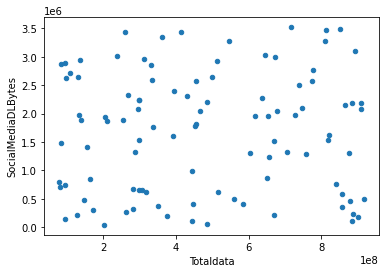

In [36]:
df_clean[df_clean['Totaldata'] > 50].sample(100).plot.scatter(x='Totaldata', y='SocialMediaDLBytes')

In [ ]:
df_clean.groupby('BearerId').aggregate({'Dur.ms': 'min', 'TotalULBytes': 'min', 'TotalDLBytes': 'min'})

In [38]:

data_usage = df_clean[['MSISDN/Number','Dur.ms.1', 'TotalDLBytes', 'TotalULBytes']]
data_usage.groupby(["MSISDN/Number"]).agg('sum')

,Dur.ms.1,TotalDLBytes,TotalULBytes
MSISDN/Number,,,
3.360100e+10,116720140.0,8.426375e+08,36053108.0
3.360100e+10,181230963.0,1.207552e+08,36104459.0
3.360100e+10,134969374.0,5.566597e+08,39306820.0
3.360101e+10,49878024.0,4.019932e+08,20327526.0
3.360101e+10,37104453.0,1.363130e+09,94280527.0
...,...,...,...
3.379000e+10,8810688.0,6.879252e+08,26716429.0
3.379000e+10,140988659.0,4.445751e+08,35732243.0
3.197021e+12,877385325.0,1.948281e+08,37295915.0


In [50]:
different_application_data = df_clean[['BearerId', 'MSISDN/Number', 'Total_Google_data', 'Total_Youtube_data', "Total_Netflix_data", "Total_Email_data", "Total_Gaming_data", "Total_Social_Media_data", "Total_Other_data"]]
different_application_data.groupby(["MSISDN/Number"]).agg('sum')

,Total_Google_data,Total_Youtube_data,Total_Netflix_data,Total_Email_data,Total_Gaming_data,Total_Social_Media_data,Total_Other_data
MSISDN/Number,,,,,,,
3.360100e+10,4389005.0,21624548.0,27180981.0,1331362.0,8.124587e+08,2232135.0,386570872.0
3.360100e+10,5334863.0,12432223.0,11221763.0,3307781.0,1.197501e+08,2660565.0,281710071.0
3.360100e+10,3443126.0,21333570.0,19353900.0,3205380.0,5.388277e+08,3195623.0,501693672.0
3.360101e+10,9678493.0,6977321.0,1942092.0,2284670.0,3.911261e+08,280294.0,35279702.0
3.360101e+10,18499616.0,41533002.0,49201724.0,3305469.0,1.314798e+09,2912542.0,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,7531269.0,26647843.0,14902538.0,1006915.0,6.603614e+08,300183.0,295282817.0
3.379000e+10,5429705.0,19851572.0,8531060.0,2514097.0,4.370033e+08,498569.0,211115113.0
3.197021e+12,10438660.0,11959905.0,26592300.0,1520771.0,1.780487e+08,715224.0,470526473.0


Exploratory Data Anaysis

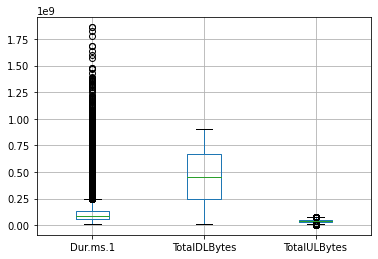

In [52]:
#looking for outliers in my cleaned data set
df_clean.boxplot(column=['Dur.ms.1', "TotalDLBytes","TotalULBytes"])

In [53]:
# Describe all  relevant variables and associated data types (slide). 
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   BearerId                 150001 non-null  object        
 1   Start                    150000 non-null  datetime64[ns]
 2   Startms                  150000 non-null  float64       
 3   End                      150000 non-null  datetime64[ns]
 4   Endms                    150000 non-null  float64       
 5   Dur.ms                   150000 non-null  float64       
 6   IMSI                     149431 non-null  float64       
 7   MSISDN/Number            148935 non-null  float64       
 8   IMEI                     149429 non-null  float64       
 9   LastLocationName         148848 non-null  object        
 10  AvgRTTDLms               122172 non-null  float64       
 11  AvgRTTULms               122189 non-null  float64       
 12  AvgBearerTPDLkbp

Text(0.5, 1.0, 'Duration Histogram in ms')

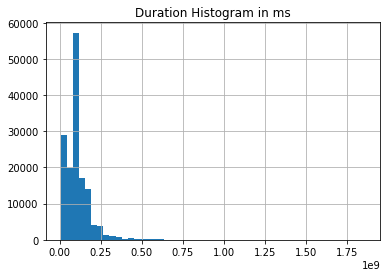

In [60]:



# plotting Histogram for Duration

df_clean["Dur.ms.1"].hist(bins = 50)
plt.title("Duration Histogram in ms")

Text(0.5, 1.0, 'Total Download Histogram')

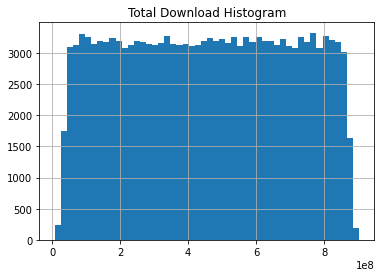

In [61]:
# plotting Total Download Histogram

df_clean["TotalDLBytes"].hist(bins = 50)
plt.title("Total Download Histogram")


Text(0.5, 1.0, 'Total Upload Histogram')

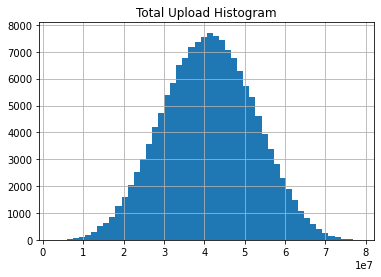

In [62]:
# Plotting Histogram for Total Upload 

df_clean["TotalULBytes"].hist(bins = 50)
plt.title("Total Upload Histogram")

Text(0.5, 1.0, 'Total Social Media Data Histogram')

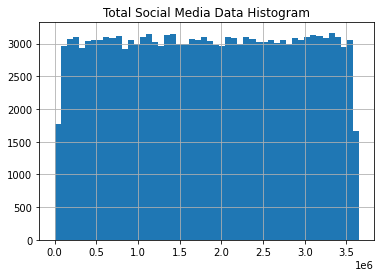

In [63]:
#plotting Histogram for Total Social Media Data

df_clean["Total_Social_Media_data"].hist(bins = 50)
plt.title("Total Social Media Data Histogram")

Text(0.5, 1.0, 'Total Google Data Histogram')

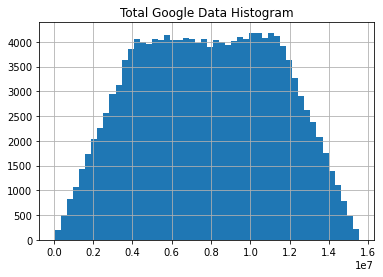

In [65]:
# plotting Histogram for Total Google Data

df_clean["Total_Google_data"].hist(bins = 50)
plt.title("Total Google Data Histogram")

Text(0.5, 1.0, 'Total Email Data Histogram')

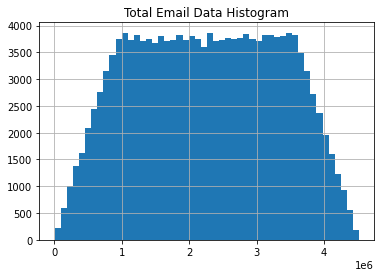

In [70]:
# plotting Histogram  for Total Email Data

df_clean["Total_Email_data"].hist(bins = 50)
plt.title("Total Email Data Histogram")

Text(0.5, 1.0, 'Total Youtube Data Histogram')

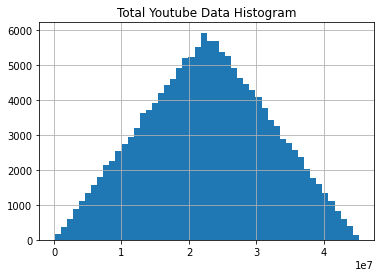

In [69]:
# plotting Histogram for Total Youtube Data 

df_clean["Total_Youtube_data"].hist(bins = 50)
plt.title("Total Youtube Data Histogram")

Text(0.5, 1.0, 'Total Netflix Data Histogram')

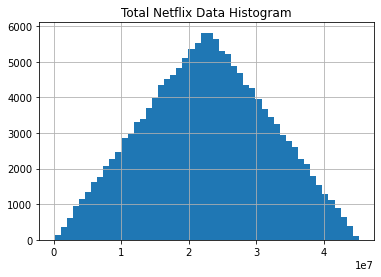

In [68]:
# plotting Histogram for Total Netflix

df_clean["Total_Netflix_data"].hist(bins = 50)
plt.title("Total Netflix Data Histogram")

Text(0.5, 1.0, 'Total Gaming Data Histogram')

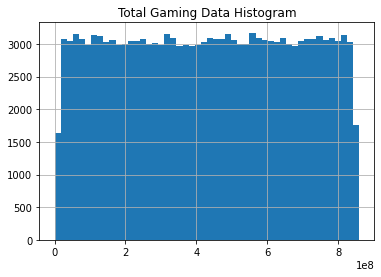

In [72]:
# plotting Histogram for Total Gaming Data

df_clean["Total_Gaming_data"].hist(bins = 50)
plt.title("Total Gaming Data Histogram")

Text(0.5, 1.0, 'Total Other Data Histogram')

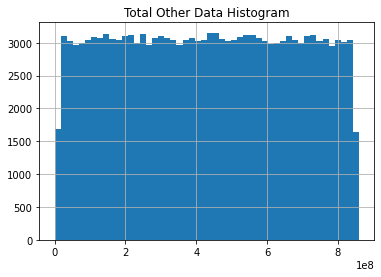

In [73]:
# plotting Histogram for Total Other Data

df_clean["Total_Other_data"].hist(bins = 50)
plt.title("Total Other Data Histogram")

Text(0.5, 1.0, 'App Data usage')

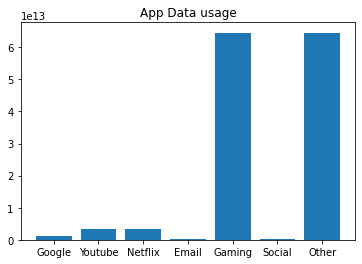

In [74]:
# plotting comparisons of each total

Total_usage = different_application_data[["Total_Google_data", "Total_Youtube_data", "Total_Netflix_data", "Total_Email_data", "Total_Gaming_data", "Total_Social_Media_data", "Total_Other_data"]]
ind = np.arange(7)
width =0.8

plt.xticks(ind , ("Google", "Youtube", "Netflix", "Email", "Gaming", "Social", "Other"))
plt.bar(ind, Total_usage.sum(), width, label = "Total Usage")
plt.title("App Data usage")